In [ ]:

!pip install numpy
!pip install matplotlib
!pip install sklearn
#!pip install tensorflow[and-cuda]
!pip install tensorflow==2.17.0
!pip install imblearn
!pip install numpy


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
pip show keras

Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [ ]:
#import tensorflow as tf
#print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
#!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
import numpy as np
# Mount Google Drive
drive.mount('/content/drive')

arr1 = np.load('/content/drive/MyDrive/seacnn/combined_array.npy')
arr2= np.load('/content/drive/MyDrive/seacnn/combined_labels.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

#arr1 = np.load('combined_array.npy')
#arr2= np.load('combined_labels.npy')

In [ ]:
arr1.shape,arr2.shape
# here we loaded 13711 imagess each with 300x300 pixels which is of rgb type ( 3 channels )

((13711, 256, 256, 3), (13711,))

In [ ]:
arr1[0][0].shape

(256, 3)

In [ ]:
un=np.unique(arr2)
len(un) # 23 lables

23

In [ ]:
ani=['Clams','Corals','Crabs','Dolphin','Eel','Fish','Jelly','Lobster','Nudibranchs','Octopus','Otter','Penguin','Puffers','Sea_Rays','Sea_Urchins','Seahorse','Seal','Sharks','Shrimps','Squid','Starfish','Turtle','Whale']
len(ani)

23

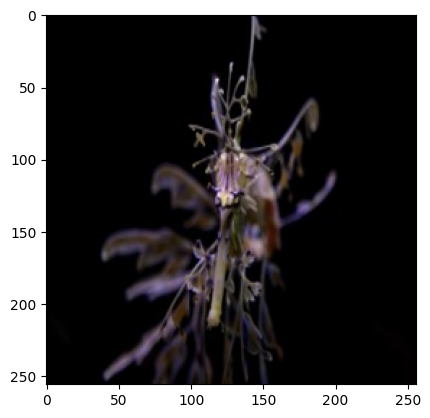

In [ ]:
# displaying random images from the data
import matplotlib.pyplot as plt
i = np.random.randint(0,arr1.shape[0])
plt.imshow(arr1[i])

In [ ]:
#arr1=arr1[:11236] # considering 21 (11kimages)
#arr2=arr2[:11236]
arr1.shape,arr2.shape

((13711, 256, 256, 3), (13711,))

In [ ]:
# splitting the data into train,validation and test (60-20-20)%

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(arr1,arr2, test_size=0.4, random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)
print(x_train.shape,y_train.shape) # train data
print(x_val.shape,y_val.shape) # validation data
print(x_test.shape,y_test.shape) # test data

(8226, 256, 256, 3) (8226,)
(2742, 256, 256, 3) (2742,)
(2743, 256, 256, 3) (2743,)


In [ ]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({22: 1157, 7: 503, 4: 468, 15: 360, 10: 348, 18: 337, 23: 335, 13: 324, 14: 318, 8: 315, 2: 307, 19: 304, 5: 298, 1: 297, 11: 295, 3: 294, 9: 292, 20: 289, 6: 288, 12: 285, 21: 283, 16: 275, 17: 254})


In [ ]:
from collections import Counter
counter = Counter(y_train)
noi =[0]*24
for i in list(counter.keys()):
    noi[i]=counter[i]
noi = noi[1:24]
print(noi)

[297, 307, 294, 468, 298, 288, 503, 315, 292, 348, 295, 285, 324, 318, 360, 275, 254, 337, 304, 289, 283, 1157, 335]


In [ ]:
import numpy as np
np.median(noi)

304.0

Text(0.5, 1.0, 'class distribution (original)')

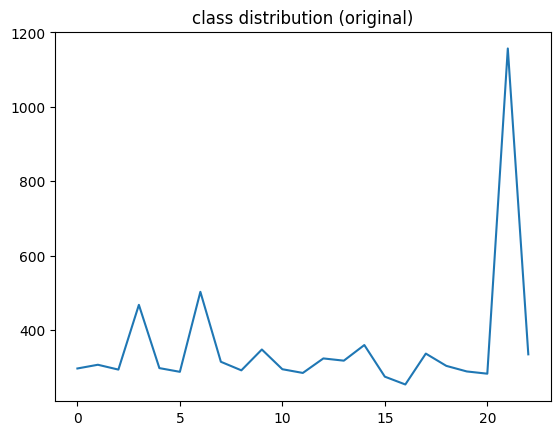

In [ ]:
# checking the class distribution of images in train data
import matplotlib.pyplot as plt
x =[x for x in range(0,23)]
plt.plot(noi)
plt.title("class distribution (original)")

In [ ]:
x_train_flattened = x_train.reshape((x_train.shape[0], -1))
x_train_flattened.shape

(8226, 196608)

In [ ]:
print(noi)

[297, 307, 294, 468, 298, 288, 503, 315, 292, 348, 295, 285, 324, 318, 360, 275, 254, 337, 304, 289, 283, 1157, 335]


In [ ]:
sampling_strategy = {i+1: min(count, int(np.median(noi))) for i, count in enumerate(noi)}
print(sampling_strategy)

{1: 297, 2: 304, 3: 294, 4: 304, 5: 298, 6: 288, 7: 304, 8: 304, 9: 292, 10: 304, 11: 295, 12: 285, 13: 304, 14: 304, 15: 304, 16: 275, 17: 254, 18: 304, 19: 304, 20: 289, 21: 283, 22: 304, 23: 304}


In [ ]:
# undersampling to the mean of all classes i.e 304.0
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# Perform undersampling
x_train_resampled, y_train_resampled = rus.fit_resample(x_train_flattened, y_train)

In [ ]:
x_train_resampled = x_train_resampled.reshape((-1, 256, 256, 3))
x_train_resampled.shape

(6798, 256, 256, 3)

[297, 304, 294, 304, 298, 288, 304, 304, 292, 304, 295, 285, 304, 304, 304, 275, 254, 304, 304, 289, 283, 304, 304]


Text(0.5, 1.0, 'class distribution (After undersampling)')

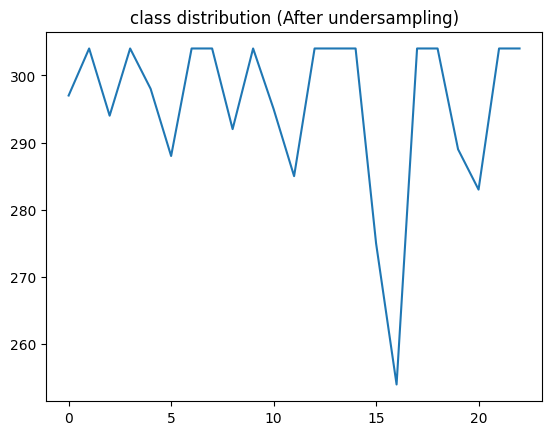

In [ ]:
from collections import Counter
counter1 = Counter(y_train_resampled)
noi1 = [x for x in counter1.values()]
print(noi1)
import matplotlib.pyplot as plt
x =[x for x in range(0,21)]
plt.plot(noi1)
plt.title("class distribution (After undersampling)")

In [ ]:
# bigger class is just <2x times the smaller class
# so, there is no imbalance in the classes

In [ ]:
# we must convert our validation_data and testdata to onehot encoding
# why?
"""
Most neural networks expect the target labels to be in a one-hot encoded format, especially when using the softmax activation function in the output layer for multiclass
classification. The softmax function outputs a probability distribution over the classes, and the network compares this with the one-hot encoded labels to compute the loss
 (e.g., categorical crossentropy).
"""

'\nMost neural networks expect the target labels to be in a one-hot encoded format, especially when using the softmax activation function in the output layer for multiclass\nclassification. The softmax function outputs a probability distribution over the classes, and the network compares this with the one-hot encoded labels to compute the loss\n (e.g., categorical crossentropy).\n'

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_hot=to_categorical(y_train_resampled-1)
y_val_hot=to_categorical(y_val-1)
y_test_hot=to_categorical(y_test-1)

In [ ]:
y_train_hot.shape,y_val_hot.shape,y_test_hot.shape

((6798, 23), (2742, 23), (2743, 23))

In [ ]:
""" Data agumentation

As the images are already diverse, there is no need for much augumentation , however small agumentations like imageflipping,image ratation or
brightness adjustment can be performed

Data augumentation increases the variability in the data and ensure the model is robust and generalize well on unseen data

"""

' Data agumentation\n\nAs the images are already diverse, there is no need for much augumentation , however small agumentations like imageflipping,image ratation or\nbrightness adjustment can be performed\n\nData augumentation increases the variability in the data and ensure the model is robust and generalize well on unseen data\n\n'

In [ ]:
x_train_resampled.shape

(6798, 256, 256, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,         # Rotate images by up to 20 degrees
    width_shift_range=0.2,     # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,    # Shift images vertically by up to 20% of the height
    zoom_range=0.2,            # Zoom in or out by up to 20%
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill missing pixels after transformation
)

# Fit the data generator on your training data
datagen.fit(x_train_resampled[:4000])

In [ ]:
# Data agumentation
"""
For each image in your dataset, ImageDataGenerator can produce a different variation each time the image is used in a training batch.
This means that over multiple epochs, the model will see multiple different variations of each original image.

While the model primarily sees variations, it could also see the original image if the applied augmentations result in minimal or no transformation
(e.g., if the random rotation happens to be 0 degrees or the flip doesn't occur).

"""

"\nFor each image in your dataset, ImageDataGenerator can produce a different variation each time the image is used in a training batch.\nThis means that over multiple epochs, the model will see multiple different variations of each original image.\n\nWhile the model primarily sees variations, it could also see the original image if the applied augmentations result in minimal or no transformation\n(e.g., if the random rotation happens to be 0 degrees or the flip doesn't occur).\n\n"

In [ ]:
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting

model.add(Dense(23, activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(datagen.flow(x_train_resampled,y_train_hot,batch_size=32),epochs=30,validation_data=(x_val,y_val_hot))

# increase the dropout fraction if your model is overfitting

#32,64,64,9 ( 20epochs-0.4 acc)
"""

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization\n\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.2))\nmodel.add(MaxPooling2D(2, 2))\n\n\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.2))\nmodel.add(MaxPooling2D(2, 2))\n\nmodel.add(Flatten())\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.5))  # Prevent overfitting\n\nmodel.add(Dense(23, activation='softmax'))\n\nmodel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')\nhistory = model.fit(datagen.flow(x_train_resampled,y_train_hot,batch_size=32),epochs=30,validation_data=(x_val,y_val_hot))\n\n# increase the dropout fraction if your model is overfitting\n\n#32,64,64,9 ( 20epochs-0.4 acc)\n"

In [ ]:

from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import ModelCheckpoint
#base_model = MobileNet(input_shape=(256, 256, 3),include_top=False,weights='imagenet')
"""
base_model = ResNet50(input_shape=(256, 256, 3), include_top=False, weights='imagenet')

base_model.trainable = False # freeze the model

"""
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='drive/MyDrive/seacnn/model_checkpoint.keras',
    monitor='val_accuracy',  # Monitor validation accuracy to save the best model
    save_best_only=True,  # Save only the model with the best validation accuracy
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1 )
"""
#custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(axis=-1),
    layers.Dropout(0.5),
    layers.Dense(23, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(datagen.flow(x_train_resampled,y_train_hot,batch_size=32),epochs=15,validation_data=(x_val,y_val_hot),callbacks=[checkpoint_callback])
"""

"\n#custom layers\nmodel = models.Sequential([\n    base_model,\n    layers.GlobalAveragePooling2D(),\n    layers.Dense(512, activation='relu'),\n    layers.BatchNormalization(axis=-1),\n    layers.Dropout(0.5),\n    layers.Dense(23, activation='softmax', kernel_regularizer=regularizers.l2(0.01))\n])\n\nmodel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')\nhistory = model.fit(datagen.flow(x_train_resampled,y_train_hot,batch_size=32),epochs=15,validation_data=(x_val,y_val_hot),callbacks=[checkpoint_callback])\n"

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('drive/MyDrive/seacnn/model_checkpoint.keras')
# model_checkpoint 0.844, 20epochs ,with base model freezed
# model_checkpoint2 0.863, 20+15epochs, with initial 30 layers base model freezed

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 23)                  │          11,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,774,471 (102.14 MB)

 Trainable params: 1,061,911 (4.05 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

 Optimizer params: 2,123,824 (8.10 MB)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(datagen.flow(x_train_resampled,y_train_hot,batch_size=32),epochs=18,validation_data=(x_val,y_val_hot),
                    callbacks=[checkpoint_callback])

Epoch 1/18


KeyboardInterrupt: 

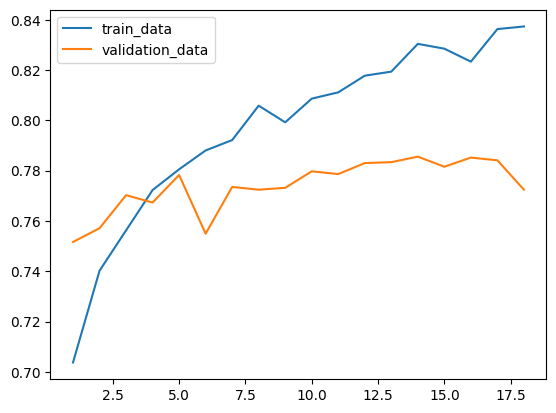

In [ ]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,19)]
plt.plot(epochs,history.history['accuracy'],label='train_data')
plt.plot(epochs,history.history['val_accuracy'],label='validation_data')
plt.legend()
plt.show()

In [ ]:
#model.save('drive/MyDrive/seacnn/model_checkpoint.keras')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 23)                  │          11,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,749,849 (102.04 MB)

 Trainable params: 1,061,911 (4.05 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

 Optimizer params: 2,099,202 (8.01 MB)

In [ ]:
"""
As the network goes deeper, pooling layers (like MaxPooling) often reduce the spatial dimensions of the feature maps. To compensate for this reduction and to maintain a
strong representation of the image data, the network increases the number of filters.
This helps the network retain and process more information even as the spatial dimensions shrink.

"""

In [ ]:
# balanced learning ( why fine tuning?)

#The initial training might have focused on learning general patterns from your dataset using the pre-trained model's frozen layers.
#Fine-tuning allows the model to fine-tune these patterns with your specific data, so retraining on all data ensures that the model adjusts correctly.

In [ ]:
# fine tuning
# unfreezing some top layers which are nearer to top layer
import tensorflow as tf
model.trainable = True  # Unfreeze the base model
from tensorflow.keras.callbacks import ModelCheckpoint
# Optionally, unfreeze only the top layers


for layer in model.layers[:-30]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint2.keras',
    monitor='val_accuracy',  # Monitor validation accuracy to save the best model
    save_best_only=True,  # Save only the model with the best validation accuracy
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1 )


In [ ]:
history = model.fit(datagen.flow(x_train_resampled,y_train_hot,batch_size=32),epochs=15,validation_data=(x_val,y_val_hot),
                     callbacks=[checkpoint_callback])

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.8552 - loss: 0.5973
Epoch 1: val_accuracy improved from -inf to 0.78228, saving model to model_checkpoint2.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 212s 948ms/step - accuracy: 0.8552 - loss: 0.5973 - val_accuracy: 0.7823 - val_loss: 0.8641
Epoch 2/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.8526 - loss: 0.6023
Epoch 2: val_accuracy improved from 0.78228 to 0.78373, saving model to model_checkpoint2.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 204s 943ms/step - accuracy: 0.8525 - loss: 0.6023 - val_accuracy: 0.7837 - val_loss: 0.8623
Epoch 3/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.8615 - loss: 0.5821
Epoch 3: val_accuracy improved from 0.78373 to 0.78483, saving model to model_checkpoint2.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 204s 944ms/step - accuracy: 0.8615 - loss: 0.5821 - val_accuracy: 0.7848 - val_loss: 0.8601
Epoch 4/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.8604 - loss: 0.5747
Epoch 4: va

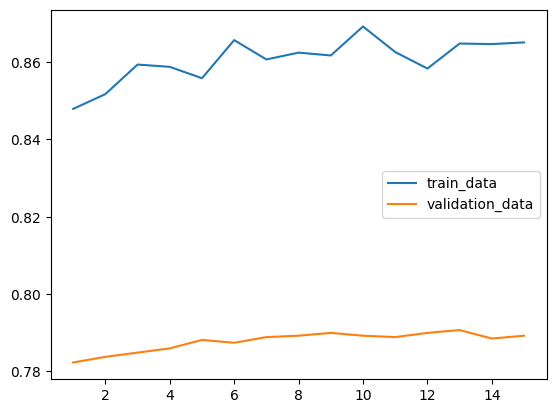

In [ ]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,16)]
plt.plot(epochs,history.history['accuracy'],label='train_data')
plt.plot(epochs,history.history['val_accuracy'],label='validation_data')
plt.legend()
plt.show()

In [39]:
model.save('drive/MyDrive/seacnn/model_checkpoint2.keras')